In [2]:
import fastf1
import pandas as pd
from matplotlib import pyplot as plt


session = fastf1.get_session(2025, 'Jeddah', 'R')
session.load()

laps_lec = session.laps.pick_driver('LEC')
laps_pia = session.laps.pick_driver('PIA')

#iki sürücünün en hızlı turları
fast_lec = session.laps.pick_driver('LEC').pick_fastest()
fast_pia = session.laps.pick_driver('PIA').pick_fastest()

#telemetri verileri
tel_lec = fast_lec.get_car_data().add_distance()
tel_pia = fast_pia.get_car_data().add_distance()
#bu telemetri verileri elimize şöyle veriler sunuyor:
#yapılan her işlem yazılmış aslında.
# noktalı saniyelerdeki hız vites rpm drs gibi verileri elimize veriyor.

req         WARNING 	DEFAULT CACHE ENABLED! (368.59 MB) C:\Users\nurul\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '16', '4', '63', '12', '44', '55', '23', '6', '14', '30', '87', 

In [3]:
fast_lec[["Driver","LapNumber","Compound", "TyreLife","Sector1Time", "Sector2Time","Sector3Time","LapTime"]]

Driver                            LEC
LapNumber                        49.0
Compound                         HARD
TyreLife                         20.0
Sector1Time    0 days 00:00:33.663000
Sector2Time    0 days 00:00:29.214000
Sector3Time    0 days 00:00:29.315000
LapTime        0 days 00:01:32.192000
dtype: object

In [4]:
fast_pia[["Driver","LapNumber","Compound", "TyreLife","Sector1Time", "Sector2Time","Sector3Time","LapTime"]]

Driver                            PIA
LapNumber                        50.0
Compound                         HARD
TyreLife                         31.0
Sector1Time    0 days 00:00:33.951000
Sector2Time    0 days 00:00:28.888000
Sector3Time    0 days 00:00:29.389000
LapTime        0 days 00:01:32.228000
dtype: object

In [5]:
df_fastTime_info = pd.DataFrame([fast_lec, fast_pia])[["Driver","LapNumber","Compound", "TyreLife","Sector1Time", "Sector2Time","Sector3Time","LapTime"]]
df_fastTime_info

,Driver,LapNumber,Compound,TyreLife,Sector1Time,Sector2Time,Sector3Time,LapTime
148,LEC,49.0,HARD,20.0,0 days 00:00:33.663000,0 days 00:00:29.214000,0 days 00:00:29.315000,0 days 00:01:32.192000
49,PIA,50.0,HARD,31.0,0 days 00:00:33.951000,0 days 00:00:28.888000,0 days 00:00:29.389000,0 days 00:01:32.228000


In [6]:
mean_lec = tel_lec["Speed"].mean()
mean_pia = tel_pia["Speed"].mean()

df_speed_comparison = pd.DataFrame({
    'Driver': [fast_lec['Driver'], fast_pia['Driver']],
    'AverageSpeed': [mean_lec, mean_pia]
})
df_speed_comparison

,Driver,AverageSpeed
0,LEC,238.243402
1,PIA,238.524496


In [7]:
S1_lec_mean = laps_lec["Sector1Time"].mean().total_seconds()
S2_lec_mean = laps_lec["Sector2Time"].mean().total_seconds()
S3_lec_mean = laps_lec["Sector3Time"].mean().total_seconds()

S1_pia_mean = laps_pia["Sector1Time"].mean().total_seconds()
S2_pia_mean = laps_pia["Sector2Time"].mean().total_seconds()
S3_pia_mean = laps_pia["Sector3Time"].mean().total_seconds()

In [8]:
sectors_mean = pd.DataFrame({
    'Driver': [fast_lec['Driver'], fast_pia['Driver']],
    'Sector 1': [S1_lec_mean, S1_pia_mean],
    'Sector 2': [S2_lec_mean, S2_pia_mean],
    'Sector 3': [S3_lec_mean, S3_pia_mean], 
})
sectors_mean

,Driver,Sector 1,Sector 2,Sector 3
0,LEC,35.84453,30.14166,31.47110
1,PIA,35.84551,30.03194,31.44368


In [9]:
s1diff = S1_lec_mean - S1_pia_mean
s2diff = S2_lec_mean - S2_pia_mean
s3diff = S3_lec_mean - S3_pia_mean

In [43]:
sectors_diff = pd.DataFrame({
    'Driver': [fast_lec['Driver']],
    'Sector 1': [s1diff],
    'Sector 2': [s2diff],
    'Sector 3': [s3diff], 
})
sectors_diff
#negatifse leclerc hızlı pozitifse piastri hızlı
#tüm tur zamanlarının ortalaması alındığında 2. sektörde çok büyük bir piastri zaferi var
#piastri 1. sektörde hızlı olsa da büyük bir fark ortaya koyamamış

,Driver,Sector 1,Sector 2,Sector 3
0,LEC,-0.00098,0.10972,0.02742


In [155]:
tel_lec

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2025-04-20 18:22:05.843,10845.0,304.0,8,99.0,False,0,car,0 days 00:00:00.160000,0 days 02:15:07.429000,13.511111
1,2025-04-20 18:22:06.163,10904.0,306.0,8,99.0,False,0,car,0 days 00:00:00.480000,0 days 02:15:07.749000,40.711111
2,2025-04-20 18:22:06.363,10957.0,308.0,8,99.0,False,0,car,0 days 00:00:00.680000,0 days 02:15:07.949000,57.822222
3,2025-04-20 18:22:06.563,10986.0,308.0,8,99.0,False,0,car,0 days 00:00:00.880000,0 days 02:15:08.149000,74.933333
4,2025-04-20 18:22:06.803,11016.0,310.0,8,99.0,False,0,car,0 days 00:00:01.120000,0 days 02:15:08.389000,95.600000
...,...,...,...,...,...,...,...,...,...,...,...
336,2025-04-20 18:23:36.803,11688.0,294.0,7,99.0,False,0,car,0 days 00:01:31.120000,0 days 02:16:38.389000,6011.574444
337,2025-04-20 18:23:37.123,10664.0,296.0,8,99.0,False,0,car,0 days 00:01:31.440000,0 days 02:16:38.709000,6037.885556
338,2025-04-20 18:23:37.323,10667.0,299.0,8,99.0,False,0,car,0 days 00:01:31.640000,0 days 02:16:38.909000,6054.496667
339,2025-04-20 18:23:37.523,10719.0,300.0,8,98.0,False,0,car,0 days 00:01:31.840000,0 days 02:16:39.109000,6071.163333


In [14]:
tel_pia

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2025-04-20 18:23:30.323,10788.0,305.0,8,99.0,False,0,car,0 days 00:00:00.039000,0 days 02:16:31.909000,3.304167
1,2025-04-20 18:23:30.523,10771.0,306.0,8,99.0,False,0,car,0 days 00:00:00.239000,0 days 02:16:32.109000,20.304167
2,2025-04-20 18:23:30.683,10819.0,306.0,8,99.0,False,0,car,0 days 00:00:00.399000,0 days 02:16:32.269000,33.904167
3,2025-04-20 18:23:31.003,10903.0,308.0,8,99.0,False,0,car,0 days 00:00:00.719000,0 days 02:16:32.589000,61.281944
4,2025-04-20 18:23:31.323,10914.0,310.0,8,99.0,False,0,car,0 days 00:00:01.039000,0 days 02:16:32.909000,88.837500
...,...,...,...,...,...,...,...,...,...,...,...
342,2025-04-20 18:25:01.364,10558.0,295.0,7,99.0,False,0,car,0 days 00:01:31.080000,0 days 02:18:02.950000,6003.213889
343,2025-04-20 18:25:01.684,10521.0,297.0,8,99.0,False,0,car,0 days 00:01:31.400000,0 days 02:18:03.270000,6029.613889
344,2025-04-20 18:25:02.004,10285.0,300.0,8,47.0,False,0,car,0 days 00:01:31.720000,0 days 02:18:03.590000,6056.280556
345,2025-04-20 18:25:02.284,10232.0,296.0,8,0.0,False,0,car,0 days 00:01:32,0 days 02:18:03.870000,6079.302778


In [15]:
#hızın en çok düştüğü yerler düşük hızlı virajlardır
#hızın nispeten az düştüğü yerler yüksek hızlı virajlaradır.
#hız düşmeye başladığı an viraj başlar.

In [16]:
#geç ve erken frenleme kontrol ediyoruz.
#fren noktalarını filtreledik
brakes_lec = tel_lec[tel_lec['Brake'] == True]
brakes_pia = tel_pia[tel_pia['Brake'] == True]

In [17]:
#0. fren indexini aldık ve 10 index sonrasını karşılaştırıyoruz. Bu indexlerdeki hızları aldık.
first_brake_point_lec = brakes_lec.iloc[0]
speed_start_lec = first_brake_point_lec['Speed']
speed_end_lec = brakes_lec.iloc[10]['Speed']

In [18]:
#viraja ilk girdiği hız ve 10 satır sonraki hızını birbirinden çıkartıyoruz böylece leclerc 39km/h yavaşlamış anlamına geliyor.
fark_lec = speed_start_lec - speed_end_lec
fark_lec

39.0

In [19]:
first_brake_point_pia = brakes_pia.iloc[0]
speed_start_pia = first_brake_point_pia['Speed']
speed_end_pia = brakes_pia.iloc[10]['Speed']

fark_pia = speed_start_pia - speed_end_pia
fark_pia

191.0

In [20]:
#piastri burada geç frenaj yapmış. 191km/h ani bir frenleme olduğu anlamına geliyor. Bu agresif bir sürüşle ya geçiş yapmış ya da yapmaya çalışmış ki geç bir frenaj yapmış demektir.
#zaten yarışta ilk virajda verstappeni geçmek için geç frenaj yapmıştı bunu da buradan çıkartmış oluyoruz.

In [157]:
brake_data_lec = tel_lec[['Distance', 'Speed', 'Brake']]

# Brake = True olan ilk aralığı bul
brake_started_lec = None
brake_ended_lec = None

for i in range(1, len(brake_data_lec)):
    if brake_data_lec.iloc[i-1]['Brake'] == False and brake_data_lec.iloc[i]['Brake'] == True: #i'inci indexten bir önceki index false ise ve i. index true ise ilk viraja giriş noktası olur
        brake_started_lec = i
    elif brake_started_lec is not None and brake_data_lec.iloc[i]['Brake'] == False: #brake started varsa ve sıradaki i değeri false olursa frenleme durdurulmuş apex noktasına gelinmiş demektir. 
        brake_ended_lec = i - 1
        break  # İlk frenleme tamamlandıktan sonra dur


#aynisini piastri icin de yapalim
brake_data_pia = tel_pia[['Distance', 'Speed', 'Brake']]

# Brake = True olan ilk aralığı bul
brake_started_pia = None
brake_ended_pia = None

for i in range(1, len(brake_data_pia)):
    if brake_data_pia.iloc[i-1]['Brake'] == False and brake_data_pia.iloc[i]['Brake'] == True: #i'inci indexten bir önceki index false ise ve i. index true ise ilk viraja giriş noktası olur
        brake_started_pia = i
    elif brake_started_pia is not None and brake_data_pia.iloc[i]['Brake'] == False: #brake started varsa ve sıradaki i değeri false olursa frenleme durdurulmuş apex noktasına gelinmiş demektir. 
        brake_ended_pia = i - 1
        break  # İlk frenleme tamamlandıktan sonra dur


In [153]:
if brake_started_lec is not None and brake_ended_lec is not None:
    start_speed_lec = brake_data_lec.iloc[brake_started_lec]['Speed']
    end_speed_lec = brake_data_lec.iloc[brake_ended_lec]['Speed']
    speed_diff_lec = start_speed_lec - end_speed_lec

if brake_started_pia is not None and brake_ended_pia is not None:
    start_speed_pia = brake_data_pia.iloc[brake_started_pia]['Speed']
    end_speed_pia = brake_data_pia.iloc[brake_ended_pia]['Speed']
    speed_diff_pia = start_speed_pia - end_speed_pia

print("Leclerc")
print("______________________________________")
print("Viraja ilk giristeki hiz: ",start_speed_lec)
print("Frenaj bittikten sonraki hiz: ",end_speed_lec)
print("Ilk giris ile frenaj sonrasi hiz farki: ",speed_diff_lec)
print(" ")
print("Piastri")
print("______________________________________")
print("Viraja ilk giristeki hiz: ",start_speed_pia)
print("Frenaj bittikten sonraki hiz: ",end_speed_pia)
print("Ilk giris ile frenaj sonrasi hiz farki: ",speed_diff_pia)


Leclerc
______________________________________
Viraja ilk giristeki hiz:  303.0
Frenaj bittikten sonraki hiz:  114.0
Ilk giris ile frenaj sonrasi hiz farki:  189.0
 
Piastri
______________________________________
Viraja ilk giristeki hiz:  285.0
Frenaj bittikten sonraki hiz:  118.0
Ilk giris ile frenaj sonrasi hiz farki:  167.0


In [159]:
#leclerc ilk virajda daha sert frenleme yapmis daha gec frenleme yapti yorumu yerinde bir yorum olur.

In [162]:
#iki pilotun da hizlarini karsilastirabilecegimiz bir hiz grafigi cikartalim ekrana

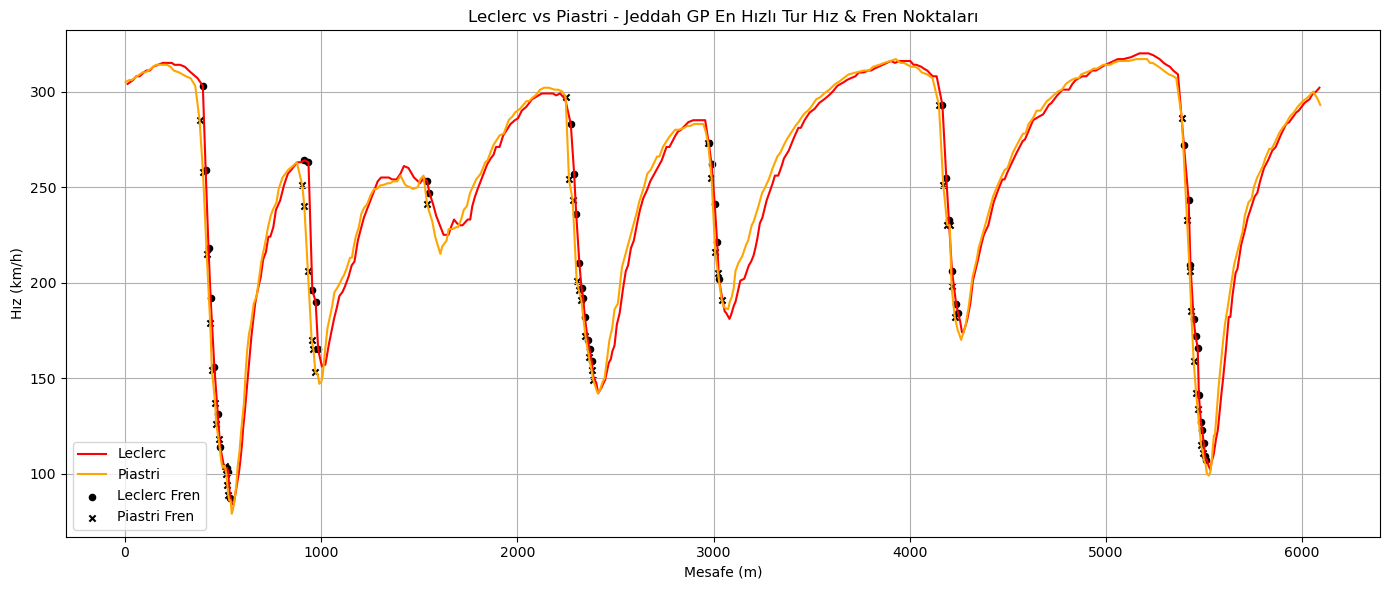

In [172]:
# Grafik çizimi
plt.figure(figsize=(14, 6))

# Hız çizgileri
plt.plot(tel_lec['Distance'], tel_lec['Speed'], color='red', label='Leclerc')
plt.plot(tel_pia['Distance'], tel_pia['Speed'], color='orange', label='Piastri')

# Leclerc fren noktaları
brake_lec = tel_lec[tel_lec['Brake'].fillna(False)]
plt.scatter(brake_lec['Distance'], brake_lec['Speed'], color='black', s=20, label='Leclerc Fren')

# Piastri fren noktaları
brake_pia = tel_pia[tel_pia['Brake'].fillna(False)]
plt.scatter(brake_pia['Distance'], brake_pia['Speed'], color='black', s=20, marker='x', label='Piastri Fren')

# Grafik ayarları
plt.title('Leclerc vs Piastri - Jeddah GP En Hızlı Tur Hız & Fren Noktaları')
plt.xlabel('Mesafe (m)')
plt.ylabel('Hız (km/h)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [174]:
#Leclerc'in Piastri'ye göre ne kadar geç fren yaptığını hızın ani düşüşe başladığı noktalarda görebiliyoruz.